In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [68]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [69]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Fill missing values

In [70]:
df.drop('id',axis=1,inplace=True)

In [71]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(value=bmi_mean, inplace=True)

In [72]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Splitting into Dependent and Independent variables

In [73]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

# Encoding

## Label Encoding

In [74]:
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X[:,4]=le.fit_transform(X[:,4])
X[:,6]=le.fit_transform(X[:,6])

## One hot encoding

In [75]:
ce=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[5,9])],remainder='passthrough')
X=np.array(ce.fit_transform(X))

In [76]:
X

array([[0.0, 0.0, 1.0, ..., 1, 228.69, 36.6],
       [0.0, 0.0, 0.0, ..., 0, 202.21, 28.893236911794673],
       [0.0, 0.0, 1.0, ..., 0, 105.92, 32.5],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 0.0, 1.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

# PCA Extraction

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = pca.fit_transform(X)

# Test Train Split

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Visualization

In [79]:
Xdf = pd.DataFrame(X)
Xdf["class"] = Y

<AxesSubplot:xlabel='0', ylabel='1'>

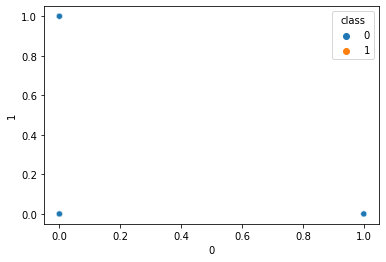

In [81]:
sns.scatterplot(data=Xdf, x=0, y=1, hue="class")

# Perceptron prediction from scratch
prediction function

In [82]:
def isCKD(row, weights):
  #loading bias first
  activation = weights[0]
  for i in range(len(row)-1):
    activation += weights[i+1]*row[i] #product of weights and the features
  if activation >= 0:
    return 1
  return 0

In [85]:
def generate_weights(data, rate, epoch):
	weights = [0.0 for i in range(len(data[0]))] #initialize weights to 0
	for epoch in range(epoch):
		sum_error = 0.0
		for row in data:
			prediction = isCKD(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + rate * error * row[i] #adjusting the weights
		print('epoch=%d error=%d' % (epoch, sum_error))
	return weights

# Calculating using only 2 features

In [86]:
x = Xdf[[1,2,"class"]].values
weights = generate_weights(data=x,rate=1,epoch=4)
y_pred = []
y_actual = []
for row in x:
  prediction = isCKD(row, weights)
  y_actual.append(row[-1])
  y_pred.append(prediction)
print()
print("The score is",accuracy_score(y_actual,y_pred))

epoch=0 error=1
epoch=1 error=3
epoch=2 error=4
epoch=3 error=4

The score is 0.9512720156555773


# Calculating with all features

In [87]:
x = Xdf.values
weights = generate_weights(data=x,rate=1,epoch=4)
y_pred = []
y_actual = []
for row in x:
  prediction = isCKD(row, weights)
  y_actual.append(row[-1])
  y_pred.append(prediction)
print()
print("The score is",accuracy_score(y_actual,y_pred))

epoch=0 error=1
epoch=1 error=3
epoch=2 error=3
epoch=3 error=4

The score is 0.9512720156555773


# Perceptron using library

In [88]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X,Y)
clf.score(X,Y)

0.861839530332681